# **1. The Chocolate Bar Problem: A Coding Challenge**

## **Introduction:**
In this problem, I use a heuristic and greedy approach to minimize the number of cuts to the chocolate bars.



### **Approach 1: Greedy Sorting-Based Method**

### **Method**  
The method begins by checking the feasibility condition: if the total chocolate available is insufficient to satisfy all children's demands (`sum(bars) < sum(children)`), the algorithm terminates immediately and returns `-1`.

If the condition is satisfied, the method explores all **four possible sorting combinations** for the bars and children’s demands:  
1. Bars in ascending order, children in ascending order.  
2. Bars in ascending order, children in descending order.  
3. Bars in descending order, children in ascending order.  
4. Bars in descending order, children in descending order.  

For each sorting combination:  
- In **descending order**, the largest child’s requirement is processed first using the largest available bar.  
- In **ascending order**, the smallest child’s requirement is processed first using the smallest available bar.  

When a bar exceeds a child's demand, a **cut** is made, and the leftover chocolate is reused efficiently by reinserting it back into the list of bars. The algorithm continues this process until all demands are satisfied.  

---

### **Correctness**  

If `sum(bars) >= sum(children)`, the algorithm guarantees termination and satisfies all demands as follows:  

1. **Feasibility**:  
   - If `sum(bars) < sum(children)`, the total chocolate is insufficient, and the algorithm returns `-1`.  
   - If `sum(bars) >= sum(children)`, a solution exists because the total available chocolate is sufficient to meet all demands.  

2. **Progress and Termination**:  
   - The algorithm processes each child's demand by:  
     a) Using a bar or a combination of bars that matches the demand.  
     b) Cutting a larger bar to satisfy the demand and reusing any leftover chocolate.  
   - Each operation **strictly reduces** the size or number of bars and eliminates one child's demand. Since the input size is finite, the algorithm must terminate after a finite number of steps.  

---

### **Why Explore All Sorting Combinations?**  
The greedy approach tests all sorting combinations (ascending and descending) for both bars and children’s demands to adapt to varying input structures. This ensures efficient use of bars and remainders while selecting the sorting order that minimizes cuts, thereby avoiding suboptimal results caused by a fixed strategy.


In [144]:
def remove_matches(b, c):
    i = 0
    while i < len(c):
        if c[i] in b:
            b.remove(c[i])
            c.pop(i)
        else:
            i += 1


def chocolate_challenge(bars, children, bars_descending=True, children_descending=True):
    if sum(bars) < sum(children):
        return -1

    bars_sorted = sorted(bars, reverse=bars_descending)
    children_sorted = sorted(children, reverse=children_descending)

    remove_matches(bars_sorted, children_sorted)

    cuts = 0
    while children_sorted:
        current_child = children_sorted.pop(0)
        while current_child > 0:
            if not bars_sorted:
                return -1
            current_bar = bars_sorted.pop(0)
            if current_bar == current_child:
                current_child = 0
            elif current_bar > current_child:
                cuts += 1
                remainder = current_bar - current_child
                if remainder > 0:
                    bars_sorted.append(remainder)
                    bars_sorted.sort(reverse=bars_descending)
                current_child = 0
            else:
                current_child -= current_bar
        remove_matches(bars_sorted, children_sorted)

    return cuts

def best_chocolate_strategy(bars, children):
    # Run the four sorting strategies with the baseline approach
    attempts = []
    attempts.append(chocolate_challenge(bars, children, True, True))    # Bars Desc, Children Desc
    attempts.append(chocolate_challenge(bars, children, False, True))   # Bars Asc, Children Desc
    attempts.append(chocolate_challenge(bars, children, True, False))   # Bars Desc, Children Asc
    attempts.append(chocolate_challenge(bars, children, False, False))  # Bars Asc, Children Asc

    # Filter results
    valid_results = [res for res in attempts if res != -1]

    if not valid_results:
        # All -1
        return -1
    else:
        return min(valid_results)


# Test combined function
test_cases = [
    {"bars": [7, 2, 5], "children": [4, 3, 2, 1], "expected": 2},
    {"bars": [5, 5, 5, 5] , "children": [4, 4, 4, 4, 4] , "expected": 4},
    {"bars": [13] , "children":  [1, 5, 4, 3] , "expected": 3},
    {"bars": [7, 2, 5] , "children": [2, 5], "expected": 0},
    {"bars": [9, 6, 6, 6, 5], "children": [8, 8, 6], "expected": 2},
    {"bars": [15,15,2,2,2], "children": [10,10,9], "expected": 2},
    {"bars": [10, 10, 1,1,1,1,1,1], "children": [5,5,5,5,2,2,2], "expected": 2},
    {"bars": [2, 5], "children": [5, 3], "expected": -1},
    {"bars": [50,50,5,5,5,5,5], "children": [25,25,25,25,20], "expected": 2},
    {"bars": [30,79,16,38], "children": [31,66,27,18], "expected": 3},
]

for i, case in enumerate(test_cases, 1):
    result = best_chocolate_strategy(case["bars"], case["children"])
    print(f"Test Case {i}:")
    print(f"Bars: {case['bars']}, Children: {case['children']}")
    print(f"Expected: {case['expected']}, Got: {result}")
    print("PASS" if result == case["expected"] else "FAIL")
    print()


Test Case 1:
Bars: [7, 2, 5], Children: [4, 3, 2, 1]
Expected: 2, Got: 2
PASS

Test Case 2:
Bars: [5, 5, 5, 5], Children: [4, 4, 4, 4, 4]
Expected: 4, Got: 4
PASS

Test Case 3:
Bars: [13], Children: [1, 5, 4, 3]
Expected: 3, Got: 3
PASS

Test Case 4:
Bars: [7, 2, 5], Children: [2, 5]
Expected: 0, Got: 0
PASS

Test Case 5:
Bars: [9, 6, 6, 6, 5], Children: [8, 8, 6]
Expected: 2, Got: 2
PASS

Test Case 6:
Bars: [15, 15, 2, 2, 2], Children: [10, 10, 9]
Expected: 2, Got: 3
FAIL

Test Case 7:
Bars: [10, 10, 1, 1, 1, 1, 1, 1], Children: [5, 5, 5, 5, 2, 2, 2]
Expected: 2, Got: 2
PASS

Test Case 8:
Bars: [2, 5], Children: [5, 3]
Expected: -1, Got: -1
PASS

Test Case 9:
Bars: [50, 50, 5, 5, 5, 5, 5], Children: [25, 25, 25, 25, 20]
Expected: 2, Got: 2
PASS

Test Case 10:
Bars: [30, 79, 16, 38], Children: [31, 66, 27, 18]
Expected: 3, Got: 3
PASS



### **Approach 2: Dynamic Programming with Greedy Optimization**

### **Method**  
The method builds on the feasibility condition (`sum(bars) >= sum(children)`) and explores all **four sorting combinations** for bars and children’s demands, as in Approach 1. For each demand, the algorithm attempts to minimize cuts by prioritizing precise bar usage as follows:

1. **Exact Match Using DP**:  
   - The algorithm uses a dynamic programming (DP) subset sum approach to find an exact combination of bars that satisfies the current demand.  
   - If successful, the selected bars are removed without requiring any cuts.

2. **Greedy Fallback**:  
   - If no exact match exists:  
     - A larger bar is **cut** to satisfy the demand, and the leftover chocolate is reused efficiently.  
     - If cutting is not possible, smaller bars are **combined** in ascending order to meet the demand as closely as possible.  

3. **Last Resort**:  
   - If all other options fail, the algorithm cuts the largest remaining bar to satisfy the demand, reusing any leftover chocolate.  

---

### **Correctness**  
The method guarantees termination and correctness:  
- **Feasibility**: If `sum(bars) >= sum(children)`, the algorithm can always satisfy all demands.  
- **Progress**: Each step either removes bars, cuts a bar, or reduces the remaining demand, ensuring finite termination.  




In [136]:
def minimal_cuts_optimized(bars, children, bars_order="desc", children_order="desc"):
    from collections import Counter

    # Sort bars and children according to the provided order
    if bars_order == "asc":
        bars = sorted(bars)
    else:
        bars = sorted(bars, reverse=True)

    if children_order == "asc":
        children = sorted(children)
    else:
        children = sorted(children, reverse=True)

    if sum(bars) < sum(children):
        return -1

    def subset_sum_dp(bars, target):
        dp = [None] * (target + 1)
        dp[0] = []
        for bar in bars:
            for t in range(target, bar - 1, -1):
                if dp[t - bar] is not None and dp[t] is None:
                    dp[t] = dp[t - bar] + [bar]
        return dp[target]

    def update_bars(bars, used_bars, leftover=None):
        bar_counter = Counter(bars)
        for bar in used_bars:
            bar_counter[bar] -= 1
        updated_bars = [b for b, cnt in bar_counter.items() for _ in range(cnt)]
        if leftover:
            updated_bars.append(leftover)
        return sorted(updated_bars, reverse=(bars_order == "desc"))

    total_cuts = 0

    for demand in children:
        # Step 1: Check for an exact match using DP
        exact_match = subset_sum_dp(bars, demand)
        if exact_match:
            bars = update_bars(bars, exact_match)
            continue

        # Step 2: If no exact match, cut one larger bar
        for bar in bars:
            if bar > demand:
                leftover = bar - demand
                bars = update_bars(bars, [bar], leftover)
                total_cuts += 1
                break
        else:
            # Step 3: Combine bars to meet the exact demand if possible
            total = 0
            used_bars = []
            remaining_bars = list(bars)
            remaining_bars.sort()  # Sort bars in ascending order

            for bar in remaining_bars:
                if total + bar <= demand:
                    used_bars.append(bar)
                    total += bar
                if total == demand:
                    bars = update_bars(bars, used_bars)
                    break
            else:
                # If no exact match is found, feed bars greedily
                total = 0
                used_bars = []
                for bar in bars:
                    used_bars.append(bar)
                    total += bar
                    if total >= demand:
                        leftover = total - demand if total > demand else None
                        bars = update_bars(bars, used_bars, leftover)
                        total_cuts += 1 if leftover else 0
                        break
                else:
                    # Step 4: Cut the largest bar as a last resort
                    largest_bar = max(bars)
                    leftover = largest_bar - demand
                    bars = update_bars(bars, [largest_bar], leftover)
                    total_cuts += 1

    return total_cuts

# Test case function to evaluate all 4 combinations
def find_minimal_cuts_all_orders(bars, children):
    orders = [("asc", "asc"), ("asc", "desc"), ("desc", "asc"), ("desc", "desc")]
    min_cuts = float("inf")

    for bars_order, children_order in orders:
        result = minimal_cuts_optimized(bars, children, bars_order, children_order)
        if result != -1:
            min_cuts = min(min_cuts, result)

    return min_cuts if min_cuts != float("inf") else -1


# Test combined function
test_cases = [
    {"bars": [7, 2, 5], "children": [4, 3, 2, 1], "expected": 2},
    {"bars": [5, 5, 5, 5] , "children": [4, 4, 4, 4, 4] , "expected": 4},
    {"bars": [13] , "children":  [1, 5, 4, 3] , "expected": 3},
    {"bars": [7, 2, 5] , "children": [2, 5], "expected": 0},
    {"bars": [9, 6, 6, 6, 5], "children": [8, 8, 6], "expected": 2},
    {"bars": [15,15,2,2], "children": [10,10,9], "expected": 2},
    {"bars": [10, 10, 1,1,1,1,1,1], "children": [5,5,5,5,2,2,2], "expected": 2},
    {"bars": [2, 5], "children": [5, 3], "expected": -1},
    {"bars": [50,50,5,5,5,5,5], "children": [25,25,25,25,20], "expected": 2},
    {"bars": [30,79,16,38], "children": [31,66,27,18], "expected": 3},
]

# Run combined strategy on test cases
for i, case in enumerate(test_cases, 1):
    bars = case["bars"]
    children = case["children"]
    expected = case["expected"]
    print(f"\nTest Case {i}: Bars = {bars}, Children = {children}")
    result = find_minimal_cuts_all_orders(bars, children)
    print(f"Result: {result}, Expected: {expected}")
    print("PASS" if result == expected else "FAIL")


Test Case 1: Bars = [7, 2, 5], Children = [4, 3, 2, 1]
Result: 2, Expected: 2
PASS

Test Case 2: Bars = [5, 5, 5, 5], Children = [4, 4, 4, 4, 4]
Result: 4, Expected: 4
PASS

Test Case 3: Bars = [13], Children = [1, 5, 4, 3]
Result: 3, Expected: 3
PASS

Test Case 4: Bars = [7, 2, 5], Children = [2, 5]
Result: 0, Expected: 0
PASS

Test Case 5: Bars = [9, 6, 6, 6, 5], Children = [8, 8, 6]
Result: 2, Expected: 2
PASS

Test Case 6: Bars = [15, 15, 2, 2], Children = [10, 10, 9]
Result: 2, Expected: 2
PASS

Test Case 7: Bars = [10, 10, 1, 1, 1, 1, 1, 1], Children = [5, 5, 5, 5, 2, 2, 2]
Result: 2, Expected: 2
PASS

Test Case 8: Bars = [2, 5], Children = [5, 3]
Result: -1, Expected: -1
PASS

Test Case 9: Bars = [50, 50, 5, 5, 5, 5, 5], Children = [25, 25, 25, 25, 20]
Result: 2, Expected: 2
PASS

Test Case 10: Bars = [30, 79, 16, 38], Children = [31, 66, 27, 18]
Result: 4, Expected: 3
FAIL


In [145]:
def minimal_cuts_optimized(bars, children, bars_order="desc", children_order="desc"):
    from collections import Counter

    # Sort bars and children according to the provided order
    if bars_order == "asc":
        bars = sorted(bars)
    else:
        bars = sorted(bars, reverse=True)

    if children_order == "asc":
        children = sorted(children)
    else:
        children = sorted(children, reverse=True)

    print(f"\nInitial Bars (Sorted {bars_order}): {bars}")
    print(f"Initial Children (Sorted {children_order}): {children}")

    if sum(bars) < sum(children):
        print("Not enough bar length to satisfy all children.")
        return -1

    def subset_sum_dp(bars, target):
        """DP to determine exact combinations of bars to meet the target."""
        dp = [None] * (target + 1)
        dp[0] = []
        for bar in bars:
            for t in range(target, bar - 1, -1):
                if dp[t - bar] is not None and dp[t] is None:
                    dp[t] = dp[t - bar] + [bar]
        return dp[target]

    def update_bars(bars, used_bars, leftover=None):
        """Update the bars list after using some bars."""
        print(f"Used Bars: {used_bars}, Leftover: {leftover}")
        bar_counter = Counter(bars)
        for bar in used_bars:
            bar_counter[bar] -= 1
        updated_bars = [b for b, cnt in bar_counter.items() for _ in range(cnt)]
        if leftover:
            updated_bars.append(leftover)
        updated_bars.sort(reverse=(bars_order == "desc"))
        print(f"Updated Bars: {updated_bars}")
        return updated_bars

    total_cuts = 0

    for demand in children:
        print(f"\nProcessing Demand: {demand}")
        print(f"Current Bars: {bars}")

        # Step 1: Check for an exact match using DP
        exact_match = subset_sum_dp(bars, demand)
        if exact_match:
            print(f"Exact Match Found: {exact_match}")
            bars = update_bars(bars, exact_match)
            continue

        # Step 2: If no exact match, cut one larger bar
        for bar in bars:
            if bar > demand:
                leftover = bar - demand
                print(f"Cutting Bar {bar} to Meet Demand {demand}, Leftover: {leftover}")
                bars = update_bars(bars, [bar], leftover)
                total_cuts += 1
                break
        else:
            # Step 3: Combine bars to meet the exact demand if possible
            total = 0
            used_bars = []
            remaining_bars = sorted(bars)  # Sort bars in ascending order
            print("Attempting to Combine Bars to Meet Demand")

            for bar in remaining_bars:
                if total + bar <= demand:
                    used_bars.append(bar)
                    total += bar
                    print(f"Combining Bars {used_bars} -> Total So Far: {total}")
                if total == demand:
                    print(f"Exact Match Achieved for Demand {demand} with Bars {used_bars}")
                    bars = update_bars(bars, used_bars)
                    break
            else:
                # If no exact match, feed bars greedily
                print("No Exact Match. Feeding Bars Greedily...")
                total = 0
                used_bars = []
                for bar in bars:
                    used_bars.append(bar)
                    total += bar
                    print(f"Feeding Bar {bar} -> Total So Far: {total}")
                    if total >= demand:
                        leftover = total - demand if total > demand else None
                        print(f"Demand {demand} Satisfied with Bars {used_bars}, Leftover: {leftover}")
                        bars = update_bars(bars, used_bars, leftover)
                        total_cuts += 1 if leftover else 0
                        break
                else:
                    # Step 4: Cut the largest bar as a last resort
                    largest_bar = max(bars)
                    leftover = largest_bar - demand
                    print(f"Cutting Largest Bar {largest_bar} to Meet Demand {demand}, Leftover: {leftover}")
                    bars = update_bars(bars, [largest_bar], leftover)
                    total_cuts += 1

    print(f"Total Cuts: {total_cuts}")
    return total_cuts

# Test Case 10: Zoomed-In Debugging
bars = [30, 79, 16, 38]
children = [31, 66, 27, 18]
print(f"\nTest Case 10: Bars = {bars}, Children = {children}")
result = minimal_cuts_optimized(bars, children, bars_order="desc", children_order="desc")
print(f"Final Result: {result}")



Test Case 10: Bars = [30, 79, 16, 38], Children = [31, 66, 27, 18]

Initial Bars (Sorted desc): [79, 38, 30, 16]
Initial Children (Sorted desc): [66, 31, 27, 18]

Processing Demand: 66
Current Bars: [79, 38, 30, 16]
Cutting Bar 79 to Meet Demand 66, Leftover: 13
Used Bars: [79], Leftover: 13
Updated Bars: [38, 30, 16, 13]

Processing Demand: 31
Current Bars: [38, 30, 16, 13]
Cutting Bar 38 to Meet Demand 31, Leftover: 7
Used Bars: [38], Leftover: 7
Updated Bars: [30, 16, 13, 7]

Processing Demand: 27
Current Bars: [30, 16, 13, 7]
Cutting Bar 30 to Meet Demand 27, Leftover: 3
Used Bars: [30], Leftover: 3
Updated Bars: [16, 13, 7, 3]

Processing Demand: 18
Current Bars: [16, 13, 7, 3]
Attempting to Combine Bars to Meet Demand
Combining Bars [3] -> Total So Far: 3
Combining Bars [3, 7] -> Total So Far: 10
No Exact Match. Feeding Bars Greedily...
Feeding Bar 16 -> Total So Far: 16
Feeding Bar 13 -> Total So Far: 29
Demand 18 Satisfied with Bars [16, 13], Leftover: 11
Used Bars: [16, 13], 

### **Time Complexity Comparison: Approach 1 vs. Approach 2**

| **Aspect**                 | **Approach 1 (Greedy)** | **Approach 2 (DP + Greedy)** |
|----------------------------|-------------------------|-----------------------------|
| **Sorting Time**           | \( O(n log n) \)       | \( O(n log n) \)           |
| **Demand Processing**      | \( O(n) \) per demand   | \( O(n ⋅ S) \) per demand (DP) |
| **Sorting Combinations**   | 4 combinations         | 4 combinations             |
| **Overall Complexity**     | \( O(n log n) \)       | \( O(n^2) \) (worst case)   |

**Conclusion**: Approach 1 is **linearithmic**, while Approach 2 is **quadratic**








###Below, I combine the two strategies, filtering for the lowest result to achieve the minimum cuts for each input. In cases where some strategies return `-1` (indicating failure) while others provide valid results, the `-1` is ignored, and the lowest valid solution from the other strategies is selected.

I combined the two strategies—**greedy sorting-based approach** (Approach 1) and the **dynamic programming (DP) approach** (Approach 2)—to leverage their complementary strengths in minimizing cuts to satisfy children's demands.

The **greedy sorting approach** works well for straightforward cases where sorting bars and demands logically minimizes cuts:

- **Test Case 1**: Bars align naturally with demands, and the greedy strategy produces the correct result of `2`.

However, the greedy strategy struggles when precise combinations of smaller bars are required or when leftover pieces cannot be reused effectively:

- **Test Case 6**: Greedy produces `3` cuts instead of the expected `2` because it fails to identify the optimal bar combinations.

Conversely, the **DP approach** excels at finding exact combinations, making it highly effective in complex cases:

- **Test Case 6**: DP correctly identifies the optimal solution and produces `2` cuts, where the greedy strategy fails.

Yet, the DP approach struggles with fragmented inputs involving many small bars and demands, often leading to inefficiencies or suboptimal decisions:

- **Test Case 10**: DP produces `4` cuts instead of `3` because it fails to efficiently combine smaller bars to meet the demand of `18`. It resorts to larger bars (`16` and `13`), creating unnecessary leftovers and additional cuts.

Conversely, **Approach 1** handles Test Case 10 better by prioritizing larger bars logically. It efficiently uses the bar `30` to satisfy the demand `27`, minimizing fragments and achieving the correct result of `3`.

By combining these strategies:
- The **greedy approach** efficiently handles simpler cases where sorting is sufficient.
- The **DP approach** ensures correctness in complex cases requiring precise combinations.

This combined strategy mitigates the weaknesses of each individual approach, improving robustness and accuracy across diverse inputs.

In [138]:
def combined_chocolate_distribution(bars, children, debug=False):
    """
    Combine DP strategy with greedy sorting strategy.
    Returns the minimum cuts found from all valid strategies.
    """
    # Step 1: Check if demands are fulfillable
    if sum(bars) < sum(children):
        return -1

    # Step 2: Run the DP strategy
    if debug:
        print("Running DP Strategy...")
    dp_result = find_minimal_cuts_all_orders(bars, children)

    # Step 3: Run the four sorting strategies
    if debug:
        print("Running greedy Sorting strategy...")
    sorting_result = best_chocolate_strategy(bars, children)

    # Step 4: Combine results
    results = [dp_result, sorting_result]
    valid_results = [res for res in results if res != -1]

    if not valid_results:
        return -1

    return min(valid_results)

# Test cases
test_cases = [
    {"bars": [7, 2, 5], "children": [4, 3, 2, 1], "expected": 2},
    {"bars": [5, 5, 5, 5] , "children": [4, 4, 4, 4, 4] , "expected": 4},
    {"bars": [13] , "children":  [1, 5, 4, 3] , "expected": 3},
    {"bars": [7, 2, 5] , "children": [2, 5], "expected": 0},
    {"bars": [9, 6, 6, 6, 5], "children": [8, 8, 6], "expected": 2},
    {"bars": [15,15,2,2], "children": [10,10,9], "expected": 2},
    {"bars": [10, 10, 1,1,1,1,1,1], "children": [5,5,5,5,2,2,2], "expected": 2},
    {"bars": [2, 5], "children": [5, 3], "expected": -1},
    {"bars": [50,50,5,5,5,5,5], "children": [25,25,25,25,20], "expected": 2},
    {"bars": [30,79,16,38], "children": [31,66,27,18], "expected": 3},
]

# Run combined strategy on test cases
for i, case in enumerate(test_cases, 1):
    bars = case["bars"]
    children = case["children"]
    expected = case["expected"]
    print(f"\nTest Case {i}: Bars = {bars}, Children = {children}")
    result = combined_chocolate_distribution(bars, children, debug=True)
    print(f"Result: {result}, Expected: {expected}")
    print("PASS" if result == expected else "FAIL")


Test Case 1: Bars = [7, 2, 5], Children = [4, 3, 2, 1]
Running DP Strategy...
Running greedy Sorting strategy...
Result: 2, Expected: 2
PASS

Test Case 2: Bars = [5, 5, 5, 5], Children = [4, 4, 4, 4, 4]
Running DP Strategy...
Running greedy Sorting strategy...
Result: 4, Expected: 4
PASS

Test Case 3: Bars = [13], Children = [1, 5, 4, 3]
Running DP Strategy...
Running greedy Sorting strategy...
Result: 3, Expected: 3
PASS

Test Case 4: Bars = [7, 2, 5], Children = [2, 5]
Running DP Strategy...
Running greedy Sorting strategy...
Result: 0, Expected: 0
PASS

Test Case 5: Bars = [9, 6, 6, 6, 5], Children = [8, 8, 6]
Running DP Strategy...
Running greedy Sorting strategy...
Result: 2, Expected: 2
PASS

Test Case 6: Bars = [15, 15, 2, 2], Children = [10, 10, 9]
Running DP Strategy...
Running greedy Sorting strategy...
Result: 2, Expected: 2
PASS

Test Case 7: Bars = [10, 10, 1, 1, 1, 1, 1, 1], Children = [5, 5, 5, 5, 2, 2, 2]
Running DP Strategy...
Running greedy Sorting strategy...
Result

The comparison below shows that cases where the greedy approach is suboptimal appear to be a small fraction of the total cases. While the problem is relatively easy for most typical inputs, it can become significantly harder in specific worst-case scenarios. These scenarios often involve fragmented bars and demands, where finding the optimal solution requires exploring precise combinations, making the problem computationally challenging.

Calculating cuts up to 1000: 100%|██████████| 101/101 [01:28<00:00,  1.14it/s]


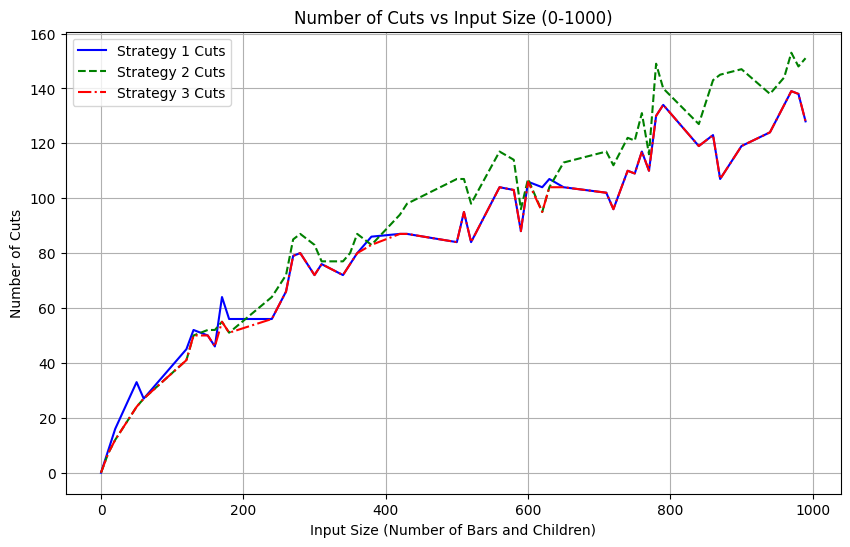


--- Total Cuts Summary ---
Total cuts for Strategy 1: 4332
Total cuts for Strategy 2: 4720
Total cuts for Strategy 3: 4283
Strategy 3 is the best strategy with fewer total cuts.


In [139]:
from tqdm import tqdm
import random
import matplotlib.pyplot as plt

# Function to run the simulation and collect results
def run_simulation(max_size, step):
    input_sizes = range(0, max_size + 1, step)  # Input sizes
    valid_cuts_1 = []  # Store valid results for the first strategy
    valid_cuts_2 = []  # Store valid results for the second strategy
    valid_cuts_3 = []  # Store valid results for the third strategy
    valid_input_sizes = []

    for size in tqdm(input_sizes, desc=f"Calculating cuts up to {max_size}"):
        bars = [random.randint(1, 100) for _ in range(size)]
        children = [random.randint(1, 100) for _ in range(size)]

        # First strategy
        result1 = best_chocolate_strategy(bars, children)
        # Second strategy
        result2 = find_minimal_cuts_all_orders(bars, children)
        # Third strategy
        result3 = combined_chocolate_distribution(bars, children)

        if result1 != -1 and result2 != -1 and result3 != -1:
            valid_cuts_1.append(result1)
            valid_cuts_2.append(result2)
            valid_cuts_3.append(result3)
            valid_input_sizes.append(size)

    return valid_input_sizes, valid_cuts_1, valid_cuts_2, valid_cuts_3

# Running simulations for input size up to 1000
input_sizes_1000, cuts_1_1000, cuts_2_1000, cuts_3_1000 = run_simulation(1000, step=10)

# Plotting a single graph (input size up to 1000)
plt.figure(figsize=(10, 6))
plt.plot(input_sizes_1000, cuts_1_1000, linestyle='-', color='b', label="Strategy 1 Cuts")
plt.plot(input_sizes_1000, cuts_2_1000, linestyle='--', color='g', label="Strategy 2 Cuts")
plt.plot(input_sizes_1000, cuts_3_1000, linestyle='-.', color='r', label="Strategy 3 Cuts")
plt.title("Number of Cuts vs Input Size (0-1000)")
plt.xlabel("Input Size (Number of Bars and Children)")
plt.ylabel("Number of Cuts")
plt.legend()
plt.grid(True)
plt.show()

# Calculating totals and comparing strategies
total_cuts_strategy_1 = sum(cuts_1_1000)
total_cuts_strategy_2 = sum(cuts_2_1000)
total_cuts_strategy_3 = sum(cuts_3_1000)

print("\n--- Total Cuts Summary ---")
print(f"Total cuts for Strategy 1: {total_cuts_strategy_1}")
print(f"Total cuts for Strategy 2: {total_cuts_strategy_2}")
print(f"Total cuts for Strategy 3: {total_cuts_strategy_3}")

# Determining the best strategy
if total_cuts_strategy_1 < total_cuts_strategy_2 and total_cuts_strategy_1 < total_cuts_strategy_3:
    print("Strategy 1 is the best strategy with fewer total cuts.")
elif total_cuts_strategy_2 < total_cuts_strategy_1 and total_cuts_strategy_2 < total_cuts_strategy_3:
    print("Strategy 2 is the best strategy with fewer total cuts.")
elif total_cuts_strategy_3 < total_cuts_strategy_1 and total_cuts_strategy_3 < total_cuts_strategy_2:
    print("Strategy 3 is the best strategy with fewer total cuts.")
else:
    print("Two or more strategies performed equally with the same total cuts.")